# Physics 145: Elementary Particle Physics
## Project Part 2 Solutions
Professor Melissa Franklin, Teaching Fellows: Ann Wang and Anthony Badea

### Load the data 

In [1]:
import uproot
import numpy as np
import matplotlib.pyplot as plt
import ROOT as R

# Load the data file
inFileName = "../../Data/data_A.exactly2lep.root"
file = uproot.open(inFileName)

# Pick up the trees of interest
tree = b'mini;1'
branches = [ b'lep_pt', b'lep_eta', b'lep_phi', b'lep_E' ]
kins = {}
for branch in branches:
    kins[branch] = file[tree].array(branch)

Welcome to JupyROOT 6.20/04


### Compute the distributions of interest

In [2]:
# Compute the momentum and convert from MeV to GeV
GeVperMeV = 1./1000
kins[b'lep_px'] = kins[b'lep_pt']*np.cos( kins[b'lep_phi']) * GeVperMeV
kins[b'lep_py'] = kins[b'lep_pt']*np.sin( kins[b'lep_phi']) * GeVperMeV
kins[b'lep_pz'] = kins[b'lep_pt']*np.sinh( kins[b'lep_eta']) * GeVperMeV
kins[b'lep_E'] = kins[b'lep_E'] * GeVperMeV

In [3]:
# Compute the angle between the particles
kins[b'lep_delta_xi'] = []
for px,py,pz in zip(kins[b'lep_px'],kins[b'lep_py'],kins[b'lep_pz']):
    p0 = np.array([px[0],py[0],pz[0]])
    p1 = np.array([px[1],py[1],pz[1]])
    numer = np.dot(p0,p1)
    denom = np.linalg.norm(p0) * np.linalg.norm(p1)
    angle = np.arccos(numer/denom)
    kins[b'lep_delta_xi'].append(angle)
# Compute cos of the angle between the particles
kins[b'lep_cos_delta_xi'] = np.cos(kins[b'lep_delta_xi'])

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in arccos
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in cos
  # This is added back by InteractiveShellApp.init_path()


In [4]:
# Compute the delta eta and cosh delta eta of the two leptons
kins[b'lep_delta_eta'] = np.array([ i[0] - i[1] for i in kins[b'lep_eta'] ] )
kins[b'lep_cosh_delta_eta']  = np.cosh(kins[b'lep_delta_eta'])

In [5]:
# Compute the delta phi and cos delta phi of the two leptons
kins[b'lep_delta_phi']  = np.array([ i[0] - i[1] for i in kins[b'lep_phi'] ] )
kins[b'lep_cos_delta_phi']  = np.cos(kins[b'lep_delta_phi'])

In [6]:
# Compute the delta R of the two leptons
kins[b'lep_delta_R'] = np.sqrt( kins[b'lep_delta_eta']**2 + kins[b'lep_delta_phi']**2)

In [7]:
# Compute the sum of the momentum of the two leptons and the total momentum magnitude
kins[b'lep_px_sum'] = np.array([ np.sum(i) for i in kins[b'lep_px'] ] )
kins[b'lep_py_sum'] = np.array([ np.sum(i) for i in kins[b'lep_py'] ] )
kins[b'lep_pz_sum'] = np.array([ np.sum(i) for i in kins[b'lep_pz'] ] )
kins[b'lep_pmag'] = np.sqrt(kins[b'lep_px_sum'] ** 2 + kins[b'lep_py_sum'] ** 2 + kins[b'lep_pz_sum'] ** 2)
# Compute the sum of the energy of the two leptons
kins[b'lep_E_sum'] = np.array([ np.sum(i) for i in kins[b'lep_E'] ] )

In [8]:
# Compute the invariant mass squared using: m^2 = E^2 - p^2 
kins[b'lep_m2'] = kins[b'lep_E_sum']**2 - kins[b'lep_pmag']**2
# Entry 394893 is known to produce negative M^2. Unclear why but let numpy handle this in plotting naturally.
# Compute the invariant mass. 
kins[b'inv_mass'] = np.sqrt( kins[b'lep_m2'] )

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """


### Load the Monte Carlo

In [9]:
inFileNameMC = "../../Data/mc_361106.Zee.small.exactly2lep.root"
fileMC = uproot.open(inFileNameMC)

In [10]:
treeMC = b'mini;1'
branchesMC = [ b'lep_pt', b'lep_eta', b'lep_phi', b'lep_E' ]
kinsMC = {}
for branch in branchesMC:
    kinsMC[branch] = fileMC[treeMC].array(branch)

In [11]:
GeVperMeV = 1./1000
kinsMC[b'lep_px'] = kinsMC[b'lep_pt']*np.cos( kinsMC[b'lep_phi']) * GeVperMeV
kinsMC[b'lep_py'] = kinsMC[b'lep_pt']*np.sin( kinsMC[b'lep_phi']) * GeVperMeV
kinsMC[b'lep_pz'] = kinsMC[b'lep_pt']*np.sinh( kinsMC[b'lep_eta']) * GeVperMeV
kinsMC[b'lep_E'] = kinsMC[b'lep_E'] * GeVperMeV

In [12]:
# Compute the angle between the particles
kinsMC[b'lep_delta_xi'] = []
for px,py,pz in zip(kinsMC[b'lep_px'],kinsMC[b'lep_py'],kinsMC[b'lep_pz']):
    p0 = np.array([px[0],py[0],pz[0]])
    p1 = np.array([px[1],py[1],pz[1]])
    numer = np.dot(p0,p1)
    denom = np.linalg.norm(p0) * np.linalg.norm(p1)
    angle = np.arccos(numer/denom)
    kinsMC[b'lep_delta_xi'].append(angle)
# Compute cos of the angle between the particles
kinsMC[b'lep_cos_delta_xi'] = np.cos(kinsMC[b'lep_delta_xi'])

In [13]:
# Compute the delta eta and cosh delta eta of the two leptons
kinsMC[b'lep_delta_eta'] = np.array([ i[0] - i[1] for i in kinsMC[b'lep_eta'] ] )
kinsMC[b'lep_cosh_delta_eta']  = np.cosh(kinsMC[b'lep_delta_eta'])

In [14]:
# Compute the delta phi and cos delta phi of the two leptons
kinsMC[b'lep_delta_phi']  = np.array([ i[0] - i[1] for i in kinsMC[b'lep_phi'] ] )
kinsMC[b'lep_cos_delta_phi']  = np.cos(kinsMC[b'lep_delta_phi'])

In [15]:
# Compute the delta R of the two leptons
kinsMC[b'lep_delta_R'] = np.sqrt( kinsMC[b'lep_delta_eta']**2 + kinsMC[b'lep_delta_phi']**2)

In [16]:
# Compute the sum of the momentum of the two leptons and the total momentum magnitude
kinsMC[b'lep_px_sum'] = np.array([ np.sum(i) for i in kinsMC[b'lep_px'] ] )
kinsMC[b'lep_py_sum'] = np.array([ np.sum(i) for i in kinsMC[b'lep_py'] ] )
kinsMC[b'lep_pz_sum'] = np.array([ np.sum(i) for i in kinsMC[b'lep_pz'] ] )
kinsMC[b'lep_pmag'] = np.sqrt(kinsMC[b'lep_px_sum'] ** 2 + kinsMC[b'lep_py_sum'] ** 2 + kinsMC[b'lep_pz_sum'] ** 2)
# Compute the sum of the energy of the two leptons
kinsMC[b'lep_E_sum'] = np.array([ np.sum(i) for i in kinsMC[b'lep_E'] ] )

In [17]:
# Compute the invariant mass squared using: m^2 = E^2 - p^2 
kinsMC[b'lep_m2'] = kinsMC[b'lep_E_sum']**2 - kinsMC[b'lep_pmag']**2
# Compute the invariant mass    
kinsMC[b'inv_mass'] = np.sqrt( kinsMC[b'lep_m2'] )

### Plot the distributions

In [18]:
def make_fig(xTitle="xTitle",yTitle="yTitle"):
    fig = plt.figure(figsize=(15,10))
    ax = plt.gca()
    ax.set_prop_cycle(color=['#002BFF','#A15FFF','#FF0061','#FF8913'])
    ax.set_xlabel(xTitle,fontsize=26,labelpad=6)
    ax.set_ylabel(yTitle,fontsize=26)
    ax.tick_params(labelsize=18, direction='out', length=8, width=2)
    ax.yaxis.offsetText.set_fontsize(18)
    ax.xaxis.labelpad = 15
    ax.yaxis.labelpad = 15
    ax.tick_params(axis='both', which='major', labelsize=25)
    return fig, ax

$\Delta\xi$ where $\Delta\xi$ is the angle between the $\vec{p}$ of the two leptons in the lab frame

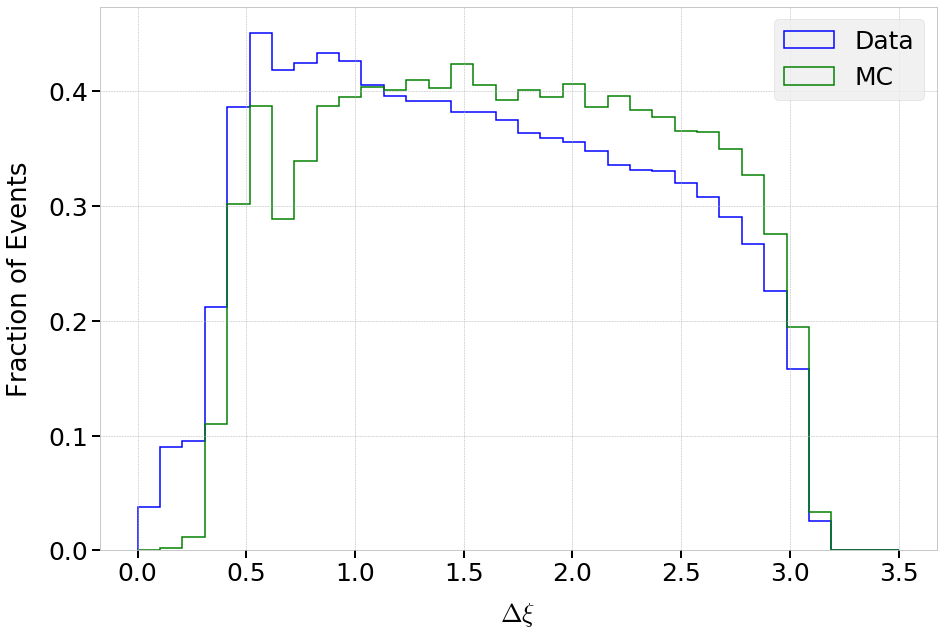

In [20]:
yTitle = "Fraction of Events"
plt.style.use('bmh')
fig, ax = make_fig(xTitle=r"$\Delta\xi$",yTitle=yTitle)
n, bins, patches = ax.hist(kins[b'lep_delta_xi'], np.linspace(0, 3.5, 35),density=True,label="Data",alpha=1.0, lw=1.5, color="blue",histtype="step")
nMC, binsMC, patchesMC = ax.hist(kinsMC[b'lep_delta_xi'], np.linspace(0, 3.5, 35),density=True,label="MC",alpha=1.0, lw=1.5, color="green",histtype="step")
ax.legend(prop={'size': 25})
ax.set_facecolor('white')
#fig.savefig("Deltaxi_DataAndMC.pdf")

$\cos\Delta\xi$ where $\Delta\xi$ is the angle between the $\vec{p}$ of the two leptons in the lab frame

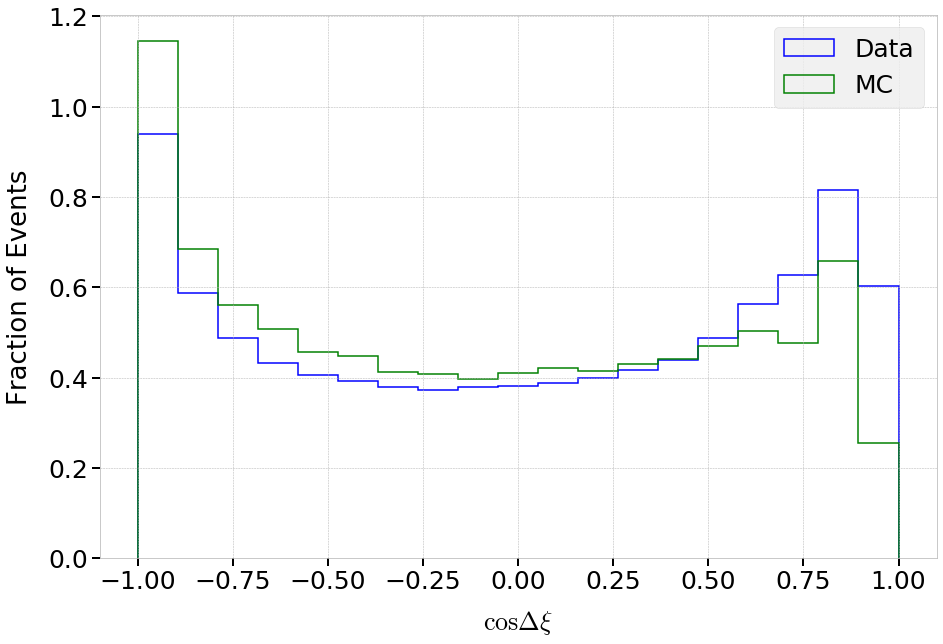

In [21]:
yTitle = "Fraction of Events"
plt.style.use('bmh')
fig, ax = make_fig(xTitle=r"$\cos\Delta\xi$",yTitle=yTitle)
n, bins, patches = ax.hist(kins[b'lep_cos_delta_xi'], np.linspace(-1, 1, 20),density=True,label="Data",alpha=1.0, lw=1.5, color="blue",histtype="step")
nMC, binsMC, patchesMC = ax.hist(kinsMC[b'lep_cos_delta_xi'], np.linspace(-1, 1, 20),density=True,label="MC",alpha=1.0, lw=1.5, color="green",histtype="step")
ax.legend(prop={'size': 25},loc="upper right")
ax.set_facecolor('white')
#fig.savefig("cosDeltaxi_DataAndMC.pdf")

$\Delta\eta$ where $\Delta\eta = \eta_{1} - \eta_{2}$ of the two leptons

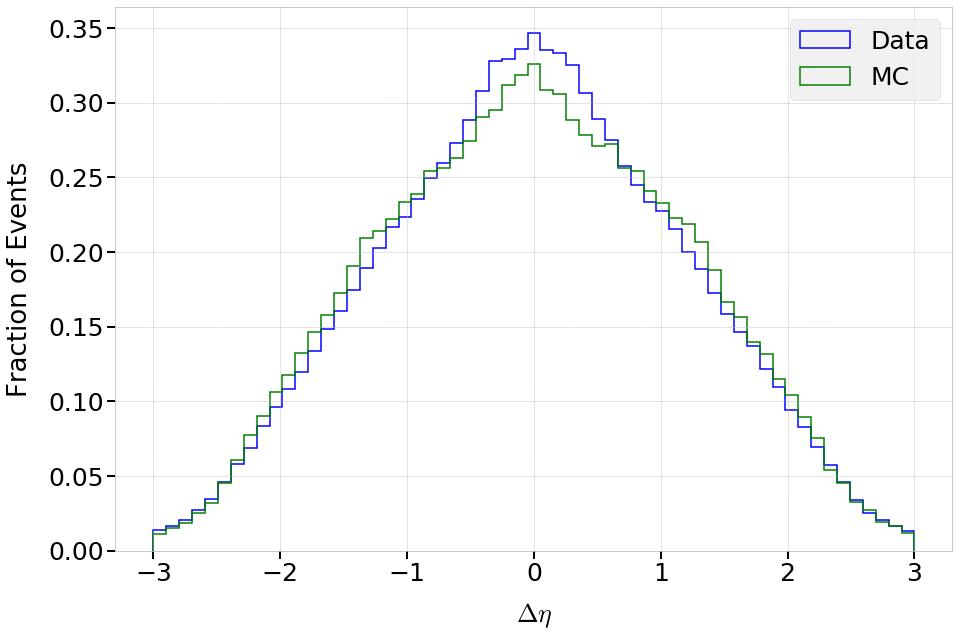

In [22]:
yTitle = "Fraction of Events"
plt.style.use('bmh')
fig, ax = make_fig(xTitle=r"$\Delta\eta$",yTitle=yTitle)
n, bins, patches = ax.hist(kins[b'lep_delta_eta'],np.linspace(-3,3,60),density=True,label="Data",alpha=1.0, lw=1.5, color="blue",histtype="step")
nMC, binsMC, patchesMC = ax.hist(kinsMC[b'lep_delta_eta'],np.linspace(-3,3,60),density=True,label="MC",alpha=1.0, lw=1.5, color="green",histtype="step")
ax.legend(prop={'size': 25})
ax.set_facecolor('white')
#fig.savefig("Deltaeta_DataAndMC.pdf")

$\cosh\Delta\eta$ where $\Delta\eta = \eta_{1} - \eta_{2}$ of the two leptons

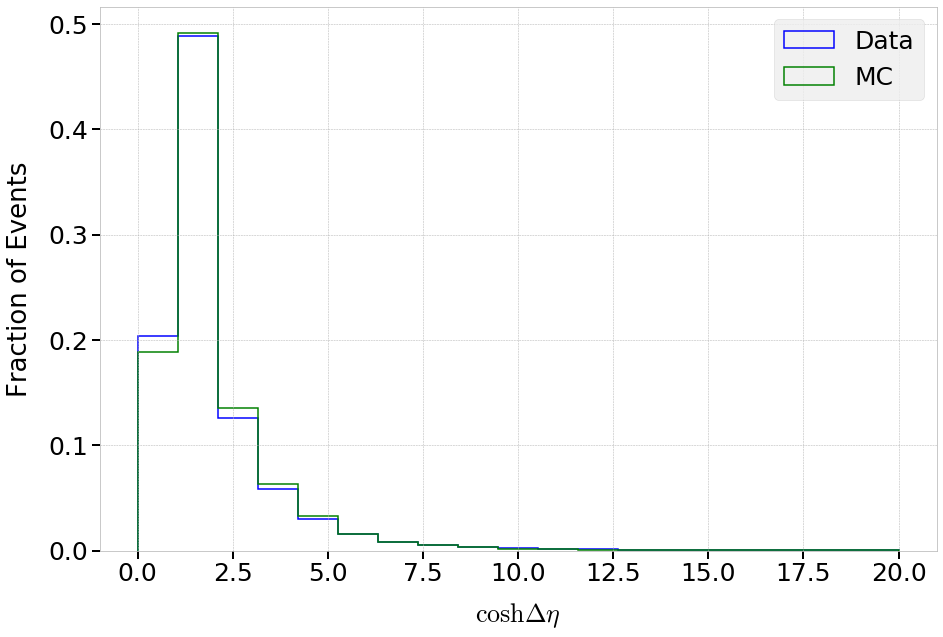

In [23]:
yTitle = "Fraction of Events"
plt.style.use('bmh')
fig, ax = make_fig(xTitle=r"$\cosh\Delta\eta$",yTitle=yTitle)
n, bins, patches = ax.hist(kins[b'lep_cosh_delta_eta'],np.linspace(0,20,20),density=True,label="Data",alpha=1.0, lw=1.5, color="blue",histtype="step")
nMC, binsMC, patchesMC = ax.hist(kinsMC[b'lep_cosh_delta_eta'],np.linspace(0,20,20),density=True,label="MC",alpha=1.0, lw=1.5, color="green",histtype="step")
ax.legend(prop={'size': 25})
ax.set_facecolor('white')
#fig.savefig("coshDeltaeta_DataAndMC.pdf")

$\Delta\phi$ where $\Delta\phi = \phi_{1} - \phi_{2}$ of the two leptons

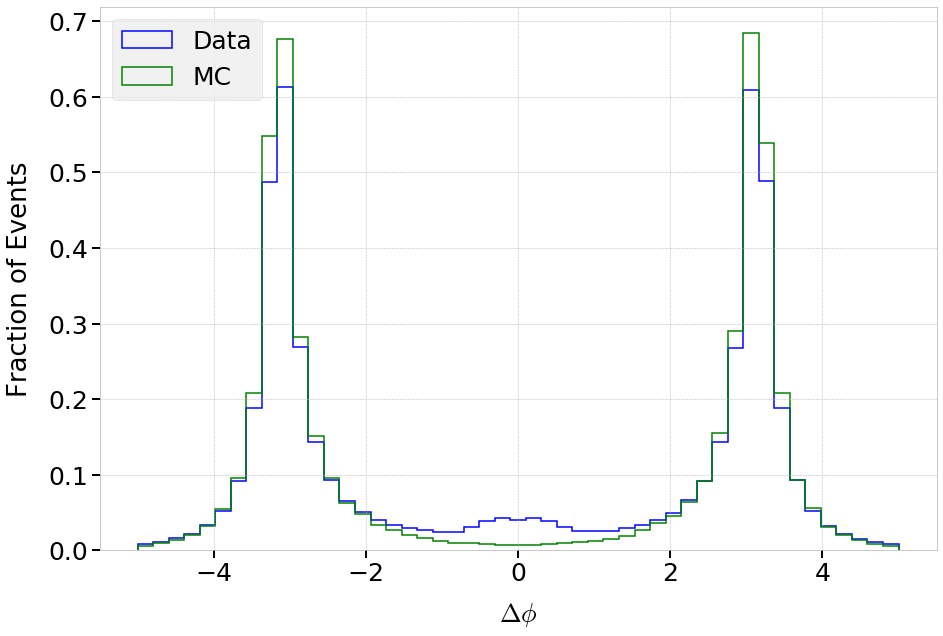

In [24]:
yTitle = "Fraction of Events"
plt.style.use('bmh')
fig, ax = make_fig(xTitle=r"$\Delta\phi$",yTitle=yTitle)
n, bins, patches = ax.hist(kins[b'lep_delta_phi'],np.linspace(-5,5,50),density=True,label="Data",alpha=1.0, lw=1.5, color="blue",histtype="step")
nMC, binsMC, patchesMC = ax.hist(kinsMC[b'lep_delta_phi'],np.linspace(-5,5,50),density=True,label="MC",alpha=1.0, lw=1.5, color="green",histtype="step")
ax.legend(prop={'size': 25},loc="upper left")
ax.set_facecolor('white')
#fig.savefig("Deltaphi_DataAndMC.pdf")

$\cos\Delta\phi$ where $\Delta\phi = \phi_{1} - \phi_{2}$ of the two leptons

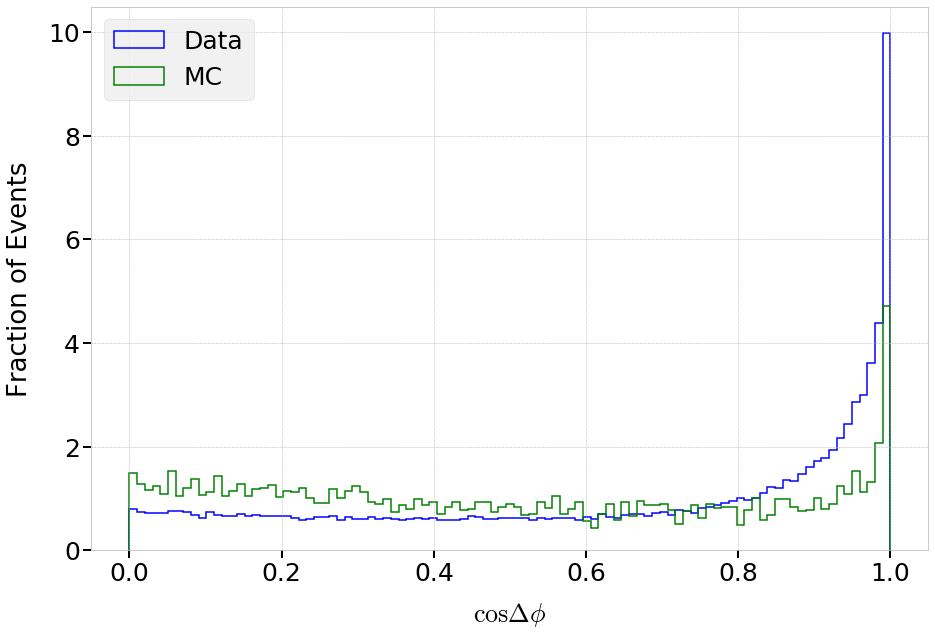

In [25]:
yTitle = "Fraction of Events"
plt.style.use('bmh')
fig, ax = make_fig(xTitle=r"$\cos\Delta\phi$",yTitle=yTitle)
n, bins, patches = ax.hist(kins[b'lep_cos_delta_phi'],np.linspace(0,1,100),density=True,label="Data",alpha=1.0, lw=1.5, color="blue",histtype="step")
nMC, binsMC, patchesMC = ax.hist(kinsMC[b'lep_cos_delta_phi'],np.linspace(0,1,100),density=True,label="MC",alpha=1.0, lw=1.5, color="green",histtype="step")
ax.legend(prop={'size': 25},loc="upper left")
ax.set_facecolor('white')
#fig.savefig("cosDeltaphi_DataAndMC.pdf")

$\Delta R = \sqrt{\left(\Delta\eta\right)^2 + \left(\Delta\phi\right)^{2}}$ where $\Delta\eta$ and $\Delta\phi$ defined above

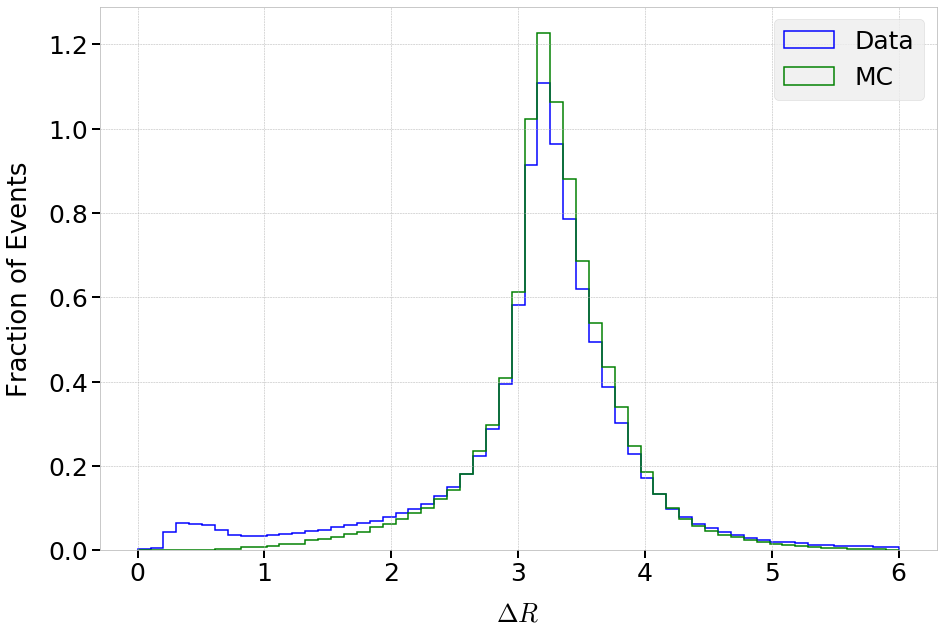

In [26]:
yTitle = "Fraction of Events"
plt.style.use('bmh')
fig, ax = make_fig(xTitle=r"$\Delta R$",yTitle=yTitle)
n, bins, patches = ax.hist(kins[b'lep_delta_R'],np.linspace(0,6,60),density=True,label="Data",alpha=1.0, lw=1.5, color="blue",histtype="step")
nMC, binsMC, patchesMC = ax.hist(kinsMC[b'lep_delta_R'],np.linspace(0,6,60),density=True,label="MC",alpha=1.0, lw=1.5, color="green",histtype="step")
ax.legend(prop={'size': 25})
ax.set_facecolor('white')
#fig.savefig("DeltaR_DataAndMC.pdf")

Invariant Mass $M$

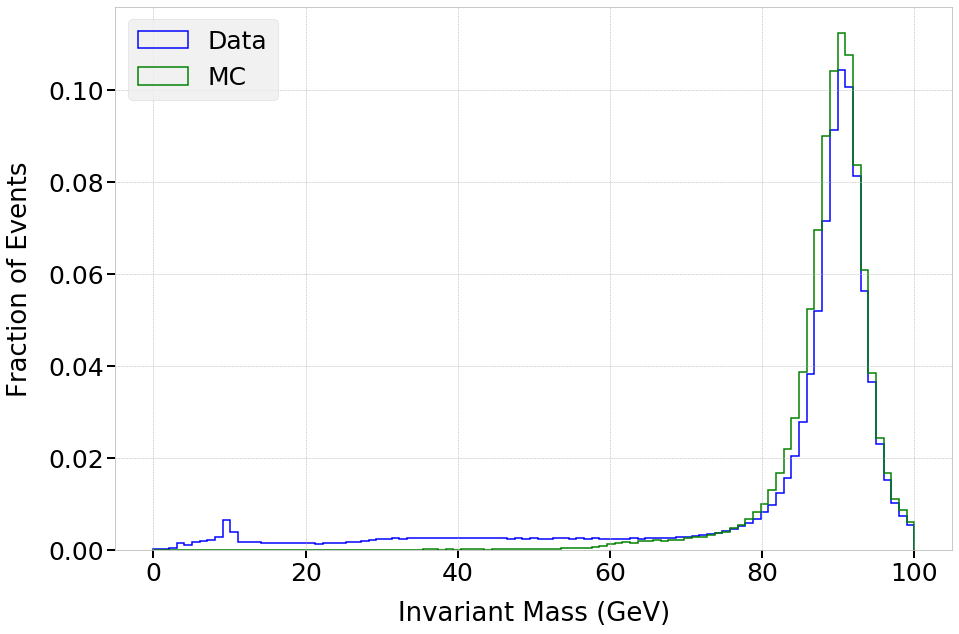

In [27]:
yTitle = "Fraction of Events"
plt.style.use('bmh')
fig, ax = make_fig(xTitle="Invariant Mass (GeV)",yTitle=yTitle)
n, bins, patches = ax.hist(kins[b'inv_mass'], np.linspace(0,100,100),density=True,label="Data",alpha=1.0, lw=1.5, color="blue",histtype="step")
nMC, binsMC, patchesMC = ax.hist(kinsMC[b'inv_mass'], np.linspace(0,100,100),density=True,label="MC",alpha=1.0, lw=1.5, color="green",histtype="step")
ax.legend(prop={'size': 25},loc="upper left")
ax.set_facecolor('white')
#fig.savefig("InvariantMass_DataAndMC.pdf")

Invariant Mass vs $\Delta\xi$

Text(0.5, 1.0, 'Data')

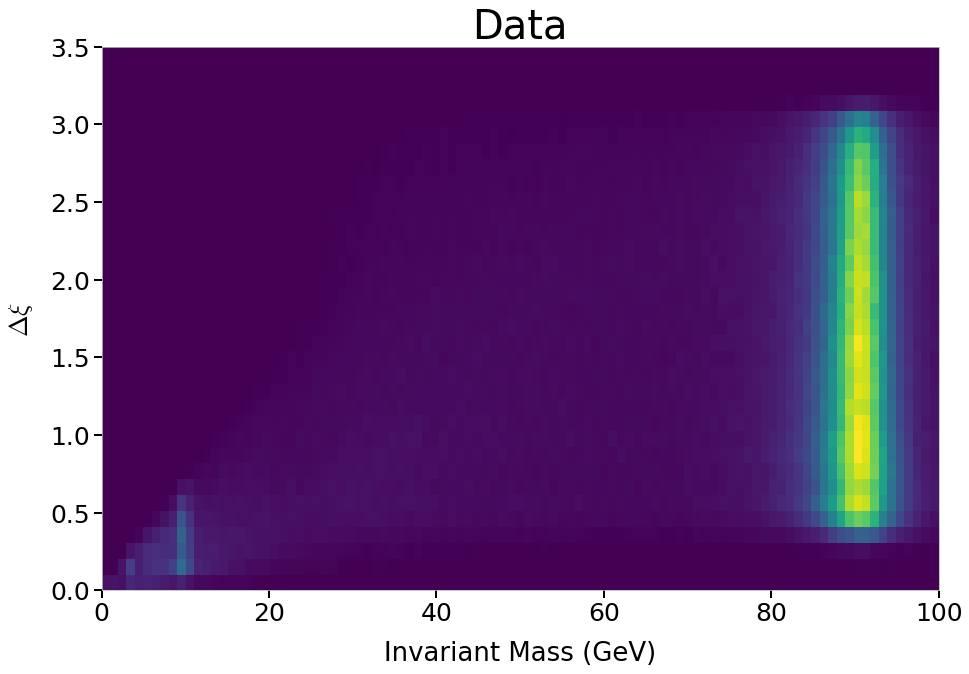

In [28]:
plt.style.use('bmh')
fig, ax = make_fig(xTitle="Invariant Mass (GeV)",yTitle=r"$\Delta\xi$")
n, xedges, yedges, image = ax.hist2d(kins[b'inv_mass'], kins[b'lep_delta_xi'],bins=[np.linspace(0,100,100),np.linspace(0, 3.5, 35)],label="MC")
ax.set_title("Data",fontsize=40)
#fig.savefig("InvariantMassVsDeltaXi_MC.pdf")

Text(0.5, 1.0, 'Monte Carlo')

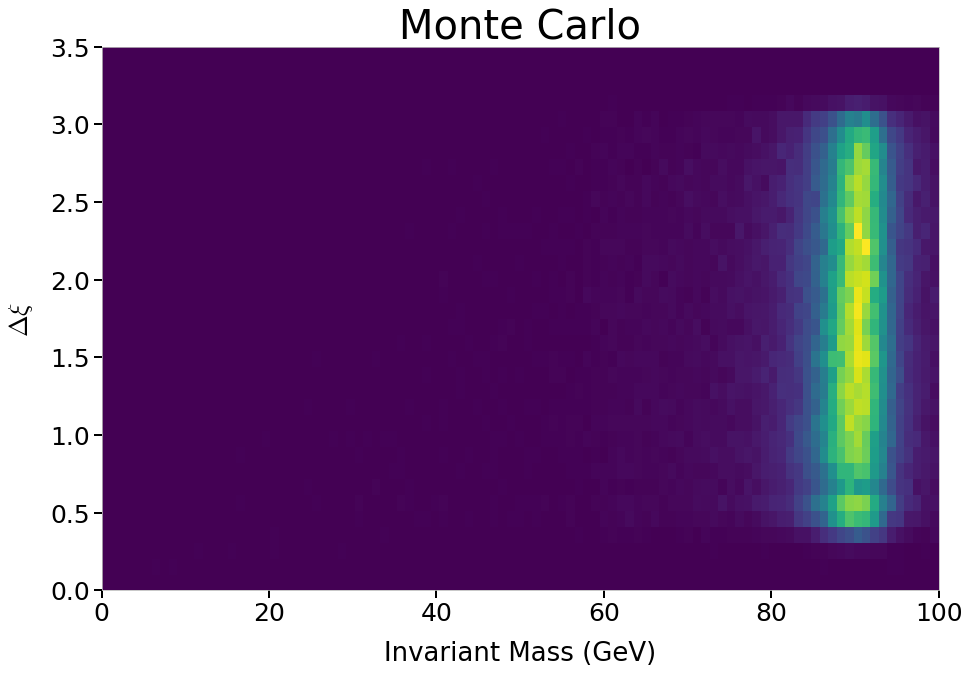

In [29]:
plt.style.use('bmh')
fig, ax = make_fig(xTitle="Invariant Mass (GeV)",yTitle=r"$\Delta\xi$")
n, xedges, yedges, image = ax.hist2d(kinsMC[b'inv_mass'], kinsMC[b'lep_delta_xi'],bins=[np.linspace(0,100,100),np.linspace(0, 3.5, 35)],label="MC")
ax.set_title("Monte Carlo",fontsize=40)
#fig.savefig("InvariantMassVsDeltaXi_MC.pdf")